<a href="https://colab.research.google.com/github/sultanbst123/AnalyticsVidya_Bigmart/blob/main/Bigmart_Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data modelling with Python

## Library & File

In [ ]:

!pip install catboost
!pip install optuna
!pip install borutashap

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDOneClassSVM
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay


import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Bigmart 2 /train_bigmart(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Bigmart 2 /test_bigmart(clean).csv")

In [ ]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID,new_Item_Fat_Content,new_Item_Type,new1,new2,new3
0,9.30,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Low_Fat,Others,0.187850,140.297699,20.70
1,5.92,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Regular,Drinks,0.188323,141.678634,19.50
2,17.50,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Low_Fat,Foods,0.187850,140.297699,21.25
3,19.20,0.000000,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Regular,Foods,0.311090,140.264072,21.10
4,8.93,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Low_Fat,Others,0.185705,141.425982,21.25


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Identifier          8523 non-null   object 
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   object 
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
 9   ID                         8523 non-null   object 
 10  new_Item_Fat_Content       8523 non-null   object 
 11  new_Item_Type              8523 non-null   object 
 12  new1                       8523 non-null   float64
 13  new2                       8523 non-null   float

In [ ]:
# ubah Outlet_Establishment_Year ke category

for i in [train, test]: 
    i["Outlet_Establishment_Year"] = i["Outlet_Establishment_Year"].astype("category")

In [ ]:
train.dtypes

Item_Weight                   float64
Item_Visibility               float64
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year    category
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
ID                             object
new_Item_Fat_Content           object
new_Item_Type                  object
new1                          float64
new2                          float64
new3                          float64
dtype: object

## Split data

In [ ]:
x = train.drop("Item_Outlet_Sales", axis=1) 
y = np.log(train.Item_Outlet_Sales)

In [ ]:
# ubah object ke category

cater = x.select_dtypes("object").columns

In [ ]:
x[cater] = x[cater].astype("category")

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3,random_state=18)

In [ ]:

# buat function 

def r2(y_val, y_pred): 
    r2 = r2_score(np.exp(y_val),np.exp(y_pred)) 
    return r2 

def rmse(y_val, y_pred): 
    rmse = mean_squared_error(np.exp(y_val), np.exp(y_pred),squared=False)
    return rmse

def mae(y_val, y_pred): 
    mae = mean_absolute_error(np.exp(y_val),np.exp(y_pred))
    return mae

In [ ]:
#coba dengan lgbm 

lg = LGBMRegressor(random_state=277)
lg.fit(x_train, y_train)

LGBMRegressor(random_state=277)

In [ ]:
pred = lg.predict(x_val)

In [ ]:
print(f"RMSE: {rmse(y_val, pred)}")
print(f"MAE: {mae(y_val, pred)}")
print(f"R2: {r2(y_val, pred)}") # untuk melihat seberapa baikah model dengan data

RMSE: 1147.5629408963434
MAE: 793.7104539710482
R2: 0.5516516639446238


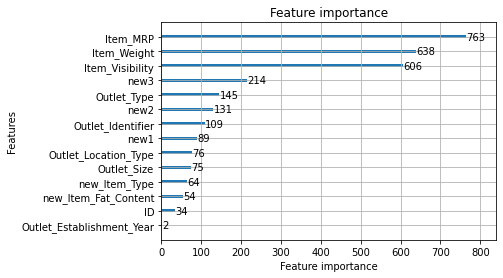

In [ ]:

# lihat feature importance

lightgbm.plot_importance(lg)

## Feature Selections with borutashap & LGBM

In [ ]:
fs = BorutaShap(model=lg,
                importance_measure="shap",
                classification = False)

In [ ]:
fs.fit(X=x_train, y=y_train, n_trials=10,random_state=0)

  0%|          | 0/10 [00:00<?, ?it/s]

3 attributes confirmed important: ['Item_MRP', 'Outlet_Type', 'Outlet_Identifier']
9 attributes confirmed unimportant: ['Outlet_Size', 'ID', 'Outlet_Establishment_Year', 'new2', 'new3', 'Outlet_Location_Type', 'new_Item_Type', 'new1', 'new_Item_Fat_Content']
2 tentative attributes remains: ['Item_Visibility', 'Item_Weight']


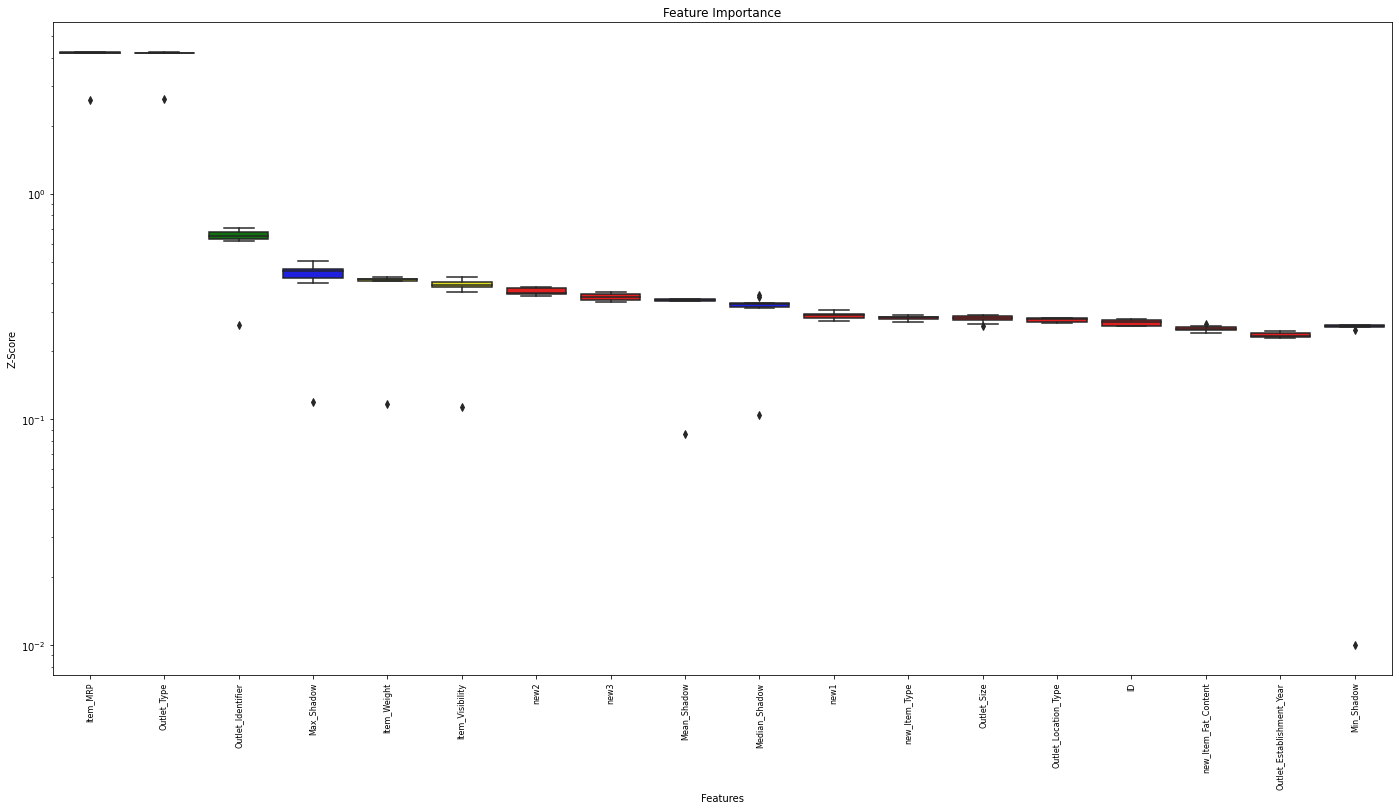

In [ ]:
fs.plot(which_features='all', figsize=(24,12))

In [ ]:
col = fs.Subset().columns.to_list()
col

['Item_MRP', 'Outlet_Type', 'Outlet_Identifier']

In [ ]:
col = ['Item_MRP', 'Outlet_Type', 'Outlet_Identifier']

In [ ]:
lg.fit(x_train[col], y_train)

LGBMRegressor(random_state=277)

In [ ]:
pred = lg.predict(x_val[col])

In [ ]:
print(f"RMSE: {rmse(y_val, pred)}")
print(f"MAE: {mae(y_val, pred)}")
print(f"R2: {r2(y_val, pred)}") # untuk melihat seberapa baikah model dengan data

RMSE: 1139.2387637648444
MAE: 785.253484178366
R2: 0.5581325196639789


In [ ]:
rmse_error = []
mae_error = []
R2 = []

## Model - 1

In [ ]:
x_train_1 = x_train[col]
x_val_1 = x_val[col]

In [ ]:
x_train_1.head()

,Item_MRP,Outlet_Type,Outlet_Identifier
2067,151.1024,Supermarket Type1,OUT045
3733,190.0530,Supermarket Type3,OUT027
8188,119.6756,Supermarket Type1,OUT046
7000,109.7254,Supermarket Type2,OUT018
2213,199.1742,Supermarket Type1,OUT035


In [ ]:
#make a var category

cater = x_train_1.select_dtypes(exclude="number").columns

In [ ]:
le = {}
for i in cater:
    le[i] = LabelEncoder()
    x_train_1[i] = le[i].fit_transform(x_train_1[i]) 
    x_val_1[i] = le[i].transform(x_val_1[i])

In [ ]:
XGB = XGBRegressor(random_state=10)
GBT = GradientBoostingRegressor(random_state=20)
HGBT = HistGradientBoostingRegressor(random_state=30)
ADA = AdaBoostRegressor(random_state=40)
EXT = ExtraTreeRegressor(random_state=50)
RF = RandomForestRegressor(random_state=60)
DT = DecisionTreeRegressor(random_state=70)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)

    #error
    pred = model.predict(x_val)
    rmse_error.append(rmse(y_val,pred)) 
    mae_error.append(mae(y_val,pred)) 
    R2.append(r2(y_val, pred)) 

    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_1(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBRegressor(random_state=10)
[12:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
->->->->->->->->->-> DONE
------------------------------
AdaBoostRegressor(random_state=40)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingRegressor(random_state=20)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingRegressor(random_state=30)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeRegressor(random_state=70)
->->->->->->->->->-> DONE
------------------------------
RandomForestRegressor(random_state=60)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeRegressor(random_state=50)
->->->->->->->->->-> DONE


## Model - 2

In [ ]:
x_train_2 = x_train[col]
x_val_2 = x_val[col]

In [ ]:
x_train_2.dtypes

Item_MRP              float64
Outlet_Type          category
Outlet_Identifier    category
dtype: object

In [ ]:
CB = CatBoostRegressor(random_state=12)
LGBM = LGBMRegressor(random_state=14)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)

       #error
       pred = model.predict(x_val)
       rmse_error.append(rmse(y_val,pred))
       mae_error.append(mae(y_val,pred))
       R2.append(r2(y_val, pred))

   #catboost
    else:         
       #fit model    
       model.fit(x_train,y_train,cat_features=cater.to_list(),verbose=False)

       #error
       pred = model.predict(x_val)
       rmse_error.append(rmse(y_val,pred))
       mae_error.append(mae(y_val,pred))
       R2.append(r2(y_val, pred))
    return model

In [ ]:
for i in [CB,LGBM]:
    print(30*"-")
    print(i)
    score_2(i, x_train_2, y_train, x_val_2, y_val)
    print(10*"->" + " DONE")

------------------------------
->->->->->->->->->-> DONE
------------------------------
LGBMRegressor(random_state=14)
->->->->->->->->->-> DONE


## Model - 3

In [ ]:
x_train_3 = x_train[col]
x_val_3 = x_val[col]

In [ ]:
x_train_3

,Item_MRP,Outlet_Type,Outlet_Identifier
2067,151.1024,Supermarket Type1,OUT045
3733,190.0530,Supermarket Type3,OUT027
8188,119.6756,Supermarket Type1,OUT046
7000,109.7254,Supermarket Type2,OUT018
2213,199.1742,Supermarket Type1,OUT035
...,...,...,...
2312,128.0020,Grocery Store,OUT010
2290,149.5734,Supermarket Type2,OUT018
5294,152.2340,Supermarket Type3,OUT027
1726,126.5362,Supermarket Type1,OUT013


In [ ]:
x_train_3 = pd.get_dummies(x_train_3) 
x_val_3 = pd.get_dummies(x_val_3)

In [ ]:
x_train_3

,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
2067,151.1024,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3733,190.0530,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8188,119.6756,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7000,109.7254,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2213,199.1742,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,128.0020,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2290,149.5734,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5294,152.2340,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1726,126.5362,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Scale kan nilai dengan Standard

sc = StandardScaler() 
x_train_3 = sc.fit_transform(x_train_3)
x_val_3 = sc.transform(x_val_3)

In [ ]:
x_train_3

array([[ 0.15000791, -0.38409422,  0.72756543, ...,  2.84265188,
        -0.34876841, -0.35657968],
       [ 0.77759113, -0.38409422, -1.37444684, ..., -0.35178419,
        -0.34876841, -0.35657968],
       [-0.35634969, -0.38409422,  0.72756543, ..., -0.35178419,
         2.86723213, -0.35657968],
       ...,
       [ 0.16824057, -0.38409422, -1.37444684, ..., -0.35178419,
        -0.34876841, -0.35657968],
       [-0.24580974, -0.38409422,  0.72756543, ..., -0.35178419,
        -0.34876841, -0.35657968],
       [-0.46892624, -0.38409422,  0.72756543, ..., -0.35178419,
        -0.34876841, -0.35657968]])

In [ ]:
LR = LinearRegression() 
KNN = KNeighborsRegressor()
SVM = SVR(kernel="linear")
ELT = ElasticNet(random_state=145) #l1_l2
LASSO = Lasso(random_state=156) #L1
RIDGE = Ridge(random_state=1467) # L2

In [ ]:
def score_3(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)

    #error
    pred = model.predict(x_val)
    rmse_error.append(rmse(y_val,pred)) 
    mae_error.append(mae(y_val,pred)) 
    R2.append(r2(y_val, pred))

    return model

In [ ]:
for i in [LR,KNN,ELT,LASSO,RIDGE]:
    print(30*"-")
    print(i)
    score_3(i, x_train_3, y_train, x_val_3, y_val)
    print(10*"->" + " DONE")

------------------------------
LinearRegression()
->->->->->->->->->-> DONE
------------------------------
KNeighborsRegressor()
->->->->->->->->->-> DONE
------------------------------
ElasticNet(random_state=145)
->->->->->->->->->-> DONE
------------------------------
Lasso(random_state=156)
->->->->->->->->->-> DONE
------------------------------
Ridge(random_state=1467)
->->->->->->->->->-> DONE


## Model - Selections

In [ ]:
all_models = pd.DataFrame({"models": ["XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT","CB","LGBM","LR","KNN","ELT","LASSO","RIDGE"], 
                          "RMSE": rmse_error, 
                          "MAE": mae_error,
                          "R2":R2})

In [ ]:
all_models

,models,RMSE,MAE,R2
0,XGB,1126.720991,777.609227,0.567790
1,ADA,1361.815306,905.661782,0.368608
2,GBT,1127.617477,778.420058,0.567101
3,HGBT,1141.392078,784.582695,0.556461
4,DT,1539.949972,1066.641878,0.192624
5,RF,1272.675595,873.813352,0.448560
6,EXT,1536.246953,1060.882192,0.196502
7,CB,1130.131306,778.526459,0.565169
8,LGBM,1139.238764,785.253484,0.558133
9,LR,1157.679745,799.840405,0.543712


In [ ]:
# R2
all_models[["models", "R2"]].sort_values("R2",ascending=False)

,models,R2
0,XGB,0.567790
2,GBT,0.567101
7,CB,0.565169
8,LGBM,0.558133
3,HGBT,0.556461
13,RIDGE,0.544142
9,LR,0.543712
10,KNN,0.504984
5,RF,0.448560
1,ADA,0.368608


In [ ]:
# RMSE 
all_models[["models", "RMSE"]].sort_values("RMSE")

,models,RMSE
0,XGB,1126.720991
2,GBT,1127.617477
7,CB,1130.131306
8,LGBM,1139.238764
3,HGBT,1141.392078
13,RIDGE,1157.133088
9,LR,1157.679745
10,KNN,1205.808385
5,RF,1272.675595
1,ADA,1361.815306


In [ ]:
#MAE
all_models[["models", "MAE"]].sort_values("MAE")

,models,MAE
0,XGB,777.609227
2,GBT,778.420058
7,CB,778.526459
3,HGBT,784.582695
8,LGBM,785.253484
13,RIDGE,799.190358
9,LR,799.840405
10,KNN,835.152581
5,RF,873.813352
1,ADA,905.661782


## Hyperparameters - tuning

### LGBM

In [ ]:
#lgbm

def objective(trial):
    params = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        'objective': trial.suggest_categorical('objective',['regression','rmse']),#'multiclass','binary']),  
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1),
    }
    model = LGBMRegressor(**params)  
    model.fit(x_train_2,y_train,eval_set=[(x_val_2,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict(x_val_2)   
    error = rmse(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-11-09 08:42:52,568] A new study created in memory with name: no-name-3d0152ca-08e7-479f-a052-60cab26e82b9
[I 2021-11-09 08:42:52,667] Trial 0 finished with value: 1221.2366473595894 and parameters: {'objective': 'rmse', 'n_estimators': 10000, 'learning_rate': 0.2852294451475448, 'num_leaves': 120, 'max_depth': 12, 'min_data_in_leaf': 400, 'lambda_l1': 15, 'lambda_l2': 45, 'min_gain_to_split': 14.372474885205161, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 1221.2366473595894.
[I 2021-11-09 08:42:52,718] Trial 1 finished with value: 1847.238992880803 and parameters: {'objective': 'rmse', 'n_estimators': 10000, 'learning_rate': 0.18900178395331352, 'num_leaves': 1560, 'max_depth': 12, 'min_data_in_leaf': 4700, 'lambda_l1': 0, 'lambda_l2': 65, 'min_gain_to_split': 0.8409988216350167, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 1221.2366473595894.
[I 2021-11-09 08:42:52,771] T

In [ ]:
lgbm_params = study.best_trial.params
lgbm_params

{'bagging_fraction': 0.6000000000000001,
 'bagging_freq': 1,
 'feature_fraction': 0.9,
 'lambda_l1': 20,
 'lambda_l2': 95,
 'learning_rate': 0.22923268216107173,
 'max_depth': 12,
 'min_data_in_leaf': 400,
 'min_gain_to_split': 0.6603205026072256,
 'n_estimators': 10000,
 'num_leaves': 580,
 'objective': 'regression'}

In [ ]:
lgbm_params = {'bagging_fraction': 0.6000000000000001,
 'bagging_freq': 1,
 'feature_fraction': 0.9,
 'lambda_l1': 20,
 'lambda_l2': 95,
 'learning_rate': 0.22923268216107173,
 'max_depth': 12,
 'min_data_in_leaf': 400,
 'min_gain_to_split': 0.6603205026072256,
 'n_estimators': 10000,
 'num_leaves': 580,
 'objective': 'regression'}

### CATBOOST

In [ ]:
#catboost

def objective(trial):
    
    params = {#'loss_function':'Logloss',              
              #'eval_metric':'Accuracy',
              'task_type' : trial.suggest_categorical("task_type",["GPU"]),
              'boosting_type': trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),            
              'bootstrap_type':trial.suggest_categorical("bootstrap_type",["Bernoulli"]), #"MVS"]),#"Bayesian" 
              'iterations':trial.suggest_categorical("iterations", [10000]),
              'od_wait':trial.suggest_int('od_wait', 500, 2000),
              'random_strength': trial.suggest_uniform('random_strength',10,50),                           
              'learning_rate' : trial.suggest_uniform('learning_rate',0.01,1.0),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'depth': trial.suggest_int('depth',1,10),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
               }

    model = CatBoostRegressor(**params)  

    model.fit(x_train_2,y_train,eval_set=[(x_val_2,y_val)],verbose=False,cat_features = cater.to_list(),early_stopping_rounds=100)

    y_preds = model.predict(x_val_2)   
    error = rmse(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-11-09 08:43:21,481] A new study created in memory with name: no-name-c6d75fca-15e7-4f36-80b5-2984da7d1a21
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2021-11-09 08:43:26,096] Trial 0 finished with value: 1120.974480854994 and parameters: {'task_type': 'GPU', 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'iterations': 10000, 'od_wait': 1935, 'random_strength': 33.54088173730486, 'learning_rate': 0.8928828864555391, 'reg_lambda': 62.824799849582234, 'subsample': 0.8388095469685007, 'depth': 3, 'min_data_in_leaf': 25, 'leaf_estimation_iterations': 10}. Best is trial 0 with value: 1120.974480854994.
[I 2021-11-09 08:43:45,581] Trial 1 finished with value: 1126.0048483256264 and parameters: {'task_type': 'GPU', 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'iterations': 10000, 'od_wait': 1184, 'random_strength': 26.13742278954652, 'learning_rate': 0.030699148003575927, 'reg_lambda': 66.52569470584515, 's

In [ ]:
cb_params = study.best_trial.params
cb_params

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bernoulli',
 'depth': 1,
 'iterations': 10000,
 'leaf_estimation_iterations': 11,
 'learning_rate': 0.9305867882778214,
 'min_data_in_leaf': 9,
 'od_wait': 1872,
 'random_strength': 24.756100827306103,
 'reg_lambda': 58.098792123997974,
 'subsample': 0.6663414751786787,
 'task_type': 'GPU'}

In [ ]:
cb_params = {'boosting_type': 'Plain',
 'bootstrap_type': 'Bernoulli',
 'depth': 1,
 'iterations': 10000,
 'leaf_estimation_iterations': 11,
 'learning_rate': 0.9305867882778214,
 'min_data_in_leaf': 9,
 'od_wait': 1872,
 'random_strength': 24.756100827306103,
 'reg_lambda': 58.098792123997974,
 'subsample': 0.6663414751786787,
 'task_type': 'GPU'}

### XGBOOST

In [ ]:

#xgboost

def objective(trial):
    
    params = {
        "tree_method": trial.suggest_categorical("tree_method",["gpu_hist"]), 
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),       
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_categorical("n_estimators",[10000]),
        "gamma": trial.suggest_int("gamma", 0,5), 
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",1,10),
    }
    model = XGBRegressor(**params)      
    model.fit(x_train_1,y_train,eval_set=[(x_val_1,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict(x_val_1)   
    error = rmse(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-11-09 08:37:00,642] A new study created in memory with name: no-name-1a0156f7-67b6-40b4-a5be-8dacda0c0233
[I 2021-11-09 08:37:06,217] Trial 0 finished with value: 1123.1539478158338 and parameters: {'tree_method': 'gpu_hist', 'lambda': 0.6339866289956484, 'alpha': 0.0968364011716878, 'colsample_bytree': 1.0, 'subsample': 0.7, 'min_child_weight': 280, 'n_estimators': 10000, 'gamma': 2, 'eta': 0.06946373598548296, 'reg_alpha': 19, 'reg_lambda': 91, 'max_depth': 6}. Best is trial 0 with value: 1123.1539478158338.
[I 2021-11-09 08:37:16,086] Trial 1 finished with value: 1124.0752135876726 and parameters: {'tree_method': 'gpu_hist', 'lambda': 0.29614731054135224, 'alpha': 0.47939984078906184, 'colsample_bytree': 1.0, 'subsample': 0.8, 'min_child_weight': 219, 'n_estimators': 10000, 'gamma': 5, 'eta': 0.03329554705026879, 'reg_alpha': 26, 'reg_lambda': 31, 'max_depth': 9}. Best is trial 0 with value: 1123.1539478158338.
[I 2021-11-09 08:37:21,252] Trial 2 finished with value: 1123.52

In [ ]:
xgb_params = study.best_trial.params
xgb_params

{'alpha': 0.05363443922625258,
 'colsample_bytree': 0.5,
 'eta': 0.0025322970961317737,
 'gamma': 3,
 'lambda': 0.0011495211356952334,
 'max_depth': 2,
 'min_child_weight': 155,
 'n_estimators': 10000,
 'reg_alpha': 5,
 'reg_lambda': 5,
 'subsample': 0.4,
 'tree_method': 'gpu_hist'}

In [ ]:
xgb_params = {'alpha': 0.05363443922625258,
 'colsample_bytree': 0.5,
 'eta': 0.0025322970961317737,
 'gamma': 3,
 'lambda': 0.0011495211356952334,
 'max_depth': 2,
 'min_child_weight': 155,
 'n_estimators': 10000,
 'reg_alpha': 5,
 'reg_lambda': 5,
 'subsample': 0.4,
 'tree_method': 'gpu_hist'}

###HGBT

In [ ]:

#hgbt

def objective(trial):
    
    params = {'max_iter':trial.suggest_categorical("max_iter", [i for i in range(100,1100,100)]),              
              'learning_rate' : trial.suggest_uniform('learning_rate',0.1,0.3),
              'l2_regularization': trial.suggest_categorical('l2_regularization',[0,0.1,0.001]),
              'max_depth': trial.suggest_int('max_depth',1,10),
              'max_leaf_nodes': trial.suggest_int('max_leaf_nodes',2,30),
              }

    model = HistGradientBoostingRegressor(**params)  

    model.fit(x_train_1,y_train) 

    y_preds = model.predict(x_val_1)   
    error = rmse(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-11-09 08:57:39,806] A new study created in memory with name: no-name-63982a88-f577-4f20-870a-a9d8ad6b1f5c
[I 2021-11-09 08:57:40,455] Trial 0 finished with value: 1149.746838743387 and parameters: {'max_iter': 300, 'learning_rate': 0.1953660599694878, 'l2_regularization': 0.001, 'max_depth': 8, 'max_leaf_nodes': 10}. Best is trial 0 with value: 1149.746838743387.
[I 2021-11-09 08:57:42,432] Trial 1 finished with value: 1184.586249179019 and parameters: {'max_iter': 700, 'learning_rate': 0.24240002559994492, 'l2_regularization': 0.001, 'max_depth': 5, 'max_leaf_nodes': 23}. Best is trial 0 with value: 1149.746838743387.
[I 2021-11-09 08:57:42,904] Trial 2 finished with value: 1147.6345295271656 and parameters: {'max_iter': 200, 'learning_rate': 0.22898131205854155, 'l2_regularization': 0, 'max_depth': 4, 'max_leaf_nodes': 27}. Best is trial 2 with value: 1147.6345295271656.
[I 2021-11-09 08:57:43,169] Trial 3 finished with value: 1134.290025107636 and parameters: {'max_iter': 20

In [ ]:
hgbt_params = study.best_trial.params
hgbt_params

{'l2_regularization': 0.1,
 'learning_rate': 0.20166817062837794,
 'max_depth': 1,
 'max_iter': 200,
 'max_leaf_nodes': 23}

In [ ]:
hgbt_params = {'l2_regularization': 0.1,
 'learning_rate': 0.20166817062837794,
 'max_depth': 1,
 'max_iter': 200,
 'max_leaf_nodes': 23}

## Cross - Validation

### GradientBoosting

In [ ]:
# Cross validation for gradient boosting

def cross_val(X, y, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params)
        alg.fit(x_train,y_train)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
gb_params = {"random_state": 2020}

In [ ]:
x_new = pd.concat([x_train_1, x_val_1]) 
y_new = pd.concat([y_train, y_val])

In [ ]:
x_new

,Item_MRP,Outlet_Type,Outlet_Identifier
2067,151.1024,1,7
3733,190.0530,3,5
8188,119.6756,1,8
7000,109.7254,2,3
2213,199.1742,1,6
...,...,...,...
5954,224.6088,3,5
4901,143.7812,3,5
7587,101.9674,1,6
3102,42.5770,1,9


In [ ]:
gb_score = cross_val(x_new, y_new, GradientBoostingRegressor, gb_params)

Fold: 1
 RMSE: 1109.0841705651922
--------------------------------------------------
Fold: 2
 RMSE: 1162.6373624351595
--------------------------------------------------
Fold: 3
 RMSE: 1127.617900854192
--------------------------------------------------
Fold: 4
 RMSE: 1091.8110330429374
--------------------------------------------------
Fold: 5
 RMSE: 1119.2888620909716
--------------------------------------------------
Fold: 6
 RMSE: 1041.1229020596968
--------------------------------------------------
Fold: 7
 RMSE: 1149.3113994804307
--------------------------------------------------

mean RMSE: 1114.41051864694


In [ ]:
pred_gb = gb_score.predict(x_val_1)

In [ ]:
rmse(y_val, pred_gb)

1106.1816382214947

In [ ]:
mae(y_val, pred_gb)

762.6138754953605

In [ ]:
r2(y_val, pred_gb)

0.5834036858765836

### HistGradientBoosting

In [ ]:
# Cross validation for HGBt

def cross_val(X, y, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
hgbt_params

{'l2_regularization': 0.1,
 'learning_rate': 0.20166817062837794,
 'max_depth': 1,
 'max_iter': 200,
 'max_leaf_nodes': 23}

In [ ]:
hgbt_score = cross_val(x_new, y_new, HistGradientBoostingRegressor, hgbt_params)

Fold: 1
 RMSE: 1108.9083132015112
--------------------------------------------------
Fold: 2
 RMSE: 1152.1013342634135
--------------------------------------------------
Fold: 3
 RMSE: 1118.0603355782414
--------------------------------------------------
Fold: 4
 RMSE: 1086.0724417288748
--------------------------------------------------
Fold: 5
 RMSE: 1100.896172097411
--------------------------------------------------
Fold: 6
 RMSE: 1037.5013240583091
--------------------------------------------------
Fold: 7
 RMSE: 1129.0850739536936
--------------------------------------------------

mean RMSE: 1104.6607135544934


In [ ]:
pred_hgbt = hgbt_score.predict(x_val_1)

In [ ]:
rmse(y_val, pred_hgbt)

1118.5542001686654

In [ ]:
mae(y_val, pred_hgbt)

771.2969373924883

In [ ]:
r2(y_val, pred_hgbt)

0.5740323690552883

### XGBoost

In [ ]:
# Cross validation for xgboost

def cross_val(X, y,model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
xgb_params["objective"] = "reg:squarederror"

In [ ]:
xgb_params

{'alpha': 0.05363443922625258,
 'colsample_bytree': 0.5,
 'eta': 0.0025322970961317737,
 'gamma': 3,
 'lambda': 0.0011495211356952334,
 'max_depth': 2,
 'min_child_weight': 155,
 'n_estimators': 10000,
 'objective': 'reg:squarederror',
 'reg_alpha': 5,
 'reg_lambda': 5,
 'subsample': 0.4,
 'tree_method': 'gpu_hist'}

In [ ]:
xgb_score = cross_val(x_new, y_new, XGBRegressor, xgb_params)

Fold: 1
 RMSE: 1104.6191632797647
--------------------------------------------------
Fold: 2
 RMSE: 1151.9905987308273
--------------------------------------------------
Fold: 3
 RMSE: 1115.1749118407524
--------------------------------------------------
Fold: 4
 RMSE: 1082.4040701966
--------------------------------------------------
Fold: 5
 RMSE: 1117.2839452450119
--------------------------------------------------
Fold: 6
 RMSE: 1041.8600805777778
--------------------------------------------------
Fold: 7
 RMSE: 1128.485169964832
--------------------------------------------------

mean RMSE: 1105.9739914050808


In [ ]:
pred_xgb = xgb_score.predict(x_val_1)

In [ ]:
rmse(y_val, pred_xgb)

1116.548157408176

In [ ]:
mae(y_val, pred_xgb)

770.6443933960389

In [ ]:
r2(y_val, pred_xgb)

0.5755588807488528

### LGBM

In [ ]:
# Cross validation for lgbm

def cross_val(X, y, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
x_new = pd.concat([x_train_2, x_val_2]) 
y_new = pd.concat([y_train, y_val])

In [ ]:
lgbm_params

{'bagging_fraction': 0.6000000000000001,
 'bagging_freq': 1,
 'feature_fraction': 0.9,
 'lambda_l1': 20,
 'lambda_l2': 95,
 'learning_rate': 0.22923268216107173,
 'max_depth': 12,
 'min_data_in_leaf': 400,
 'min_gain_to_split': 0.6603205026072256,
 'n_estimators': 10000,
 'num_leaves': 580,
 'objective': 'regression'}

In [ ]:
lgbm_score = cross_val(x_new, y_new, LGBMRegressor, lgbm_params)

Fold: 1
 RMSE: 1113.2353661859825
--------------------------------------------------
Fold: 2
 RMSE: 1149.6879682531758
--------------------------------------------------
Fold: 3
 RMSE: 1109.0969337862823
--------------------------------------------------
Fold: 4
 RMSE: 1090.472736967194
--------------------------------------------------
Fold: 5
 RMSE: 1108.2202942677848
--------------------------------------------------
Fold: 6
 RMSE: 1039.315816332617
--------------------------------------------------
Fold: 7
 RMSE: 1136.4675734080674
--------------------------------------------------

mean RMSE: 1106.6423841715862


In [ ]:
pred_lgbm = lgbm_score.predict(x_val_2)

In [ ]:
rmse(y_val, pred_lgbm)

1120.4424961255554

In [ ]:
mae(y_val, pred_lgbm)

776.0887494734056

In [ ]:
r2(y_val, pred_lgbm)

0.5725929539737472

### CatBoost

In [ ]:
# Cross validation for catboost

def cross_val(X, y, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],cat_features=cater.to_list(),verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
cb_params

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bernoulli',
 'depth': 1,
 'iterations': 10000,
 'leaf_estimation_iterations': 11,
 'learning_rate': 0.9305867882778214,
 'min_data_in_leaf': 9,
 'od_wait': 1872,
 'random_strength': 24.756100827306103,
 'reg_lambda': 58.098792123997974,
 'subsample': 0.6663414751786787,
 'task_type': 'GPU'}

In [ ]:
cb_score = cross_val(x_new, y_new, CatBoostRegressor, cb_params)

Fold: 1
 RMSE: 1107.3915044844493
--------------------------------------------------
Fold: 2
 RMSE: 1157.1562828034519
--------------------------------------------------
Fold: 3
 RMSE: 1120.7584124103523
--------------------------------------------------
Fold: 4
 RMSE: 1087.9746953394508
--------------------------------------------------
Fold: 5
 RMSE: 1099.7128151798927
--------------------------------------------------
Fold: 6
 RMSE: 1031.892647209022
--------------------------------------------------
Fold: 7
 RMSE: 1137.209230385175
--------------------------------------------------

mean RMSE: 1106.0136554016847


In [ ]:
pred_cb = cb_score.predict(x_val_2)

In [ ]:
rmse(y_val, pred_cb)

1121.6823066917177

In [ ]:
mae(y_val, pred_cb)

773.2890708659658

In [ ]:
r2(y_val, pred_cb)

0.5716465476164505

### Buat submission

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Bigmart 2 /sample_submission_bigmart.csv")

In [ ]:
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [ ]:
# predict test dengan gradient boosting

In [ ]:
tester = test[col]

In [ ]:
tester

,Item_MRP,Outlet_Type,Outlet_Identifier
0,107.8622,Supermarket Type1,OUT049
1,87.3198,Supermarket Type1,OUT017
2,241.7538,Grocery Store,OUT010
3,155.0340,Supermarket Type1,OUT017
4,234.2300,Supermarket Type3,OUT027
...,...,...,...
5676,141.3154,Supermarket Type1,OUT046
5677,169.1448,Supermarket Type2,OUT018
5678,118.7440,Supermarket Type1,OUT045
5679,214.6218,Supermarket Type1,OUT017


In [ ]:
for i in cater:
    tester[i] = le[i].transform(tester[i])

In [ ]:
tester

,Item_MRP,Outlet_Type,Outlet_Identifier
0,107.8622,1,9
1,87.3198,1,2
2,241.7538,0,0
3,155.0340,1,2
4,234.2300,3,5
...,...,...,...
5676,141.3154,1,8
5677,169.1448,2,3
5678,118.7440,1,7
5679,214.6218,1,2


In [ ]:
y_true = gb_score.predict(tester)

In [ ]:
y_true

array([7.29954421, 7.08708163, 6.23453343, ..., 7.42431587, 8.06522658,
       7.03870087])

In [ ]:
# make submission 
 
# ubah log mengunakan exp 

sub["Item_Outlet_Sales"] = np.exp(y_true)

In [ ]:
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1479.625373
1,FDW14,OUT017,1196.411135
2,NCN55,OUT010,510.062584
3,FDQ58,OUT017,2167.985741
4,FDY38,OUT027,5606.316491
...,...,...,...
5676,FDB58,OUT046,1911.526286
5677,FDD47,OUT018,2157.741443
5678,NCO17,OUT045,1676.252403
5679,FDJ26,OUT017,3181.877085


In [ ]:
sub.to_csv("submission.csv", index=False)